# Laboratory Exercise - 3 

### IST 718 - Big Data Analytics
#### By: Brandon Croarkin

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
%matplotlib inline

## Obtain 

The research question is can we use algorithms and compute to identify clothing items?  Specifically, can we determine which algorithm and compute methodology provides us the most efficient approach for classifying simple fashion images?  

Using data from Kaggle:
https://www.kaggle.com/zalando-research/fashionmnist

In [49]:
# Read in training and test data
test = pd.read_csv('fashion-mnist_test.csv')
train = pd.read_csv('fashion-mnist_train.csv')
print(test.shape)
print(train.shape)
print(train.head())

(10000, 785)
(60000, 785)
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0   

## Scrub 

In [50]:
#These are 28 x 28 images
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [51]:
##Scrub the training data

#Seperate the labels and the training data
X = np.array(train.iloc[:, 1:])
y = to_categorical(np.array(train.iloc[:, 0]))

#Split into training and test set
X_train, X_labels, y_train, y_labels = train_test_split(X, y, test_size=0.2, random_state=13)

In [55]:
#Scrub the Test data

#Seperate the labels and the testing data
X_test = np.array(test.iloc[:, 1:])
y_test = to_categorical(np.array(test.iloc[:, 0]))

In [56]:
#Reshpae the data to have 4 dimensions
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_labels = X_labels.reshape(X_labels.shape[0], img_rows, img_cols, 1)

#convert to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_labels = X_labels.astype('float32')

#standardize the values to a 0-1 scale
X_train /= 255
X_test /= 255
X_labels /= 255

## Explore 

I want to explore what each of the labels represents and view visual representations of each.

In [41]:
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

In [82]:
#make a train dataset for the images with one of each label
train_images = train.drop_duplicates(subset = ['label']).sort_values(by = ['label'])
train_images

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
29,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
21,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_miscl.png', dpi=300)
plt.show()

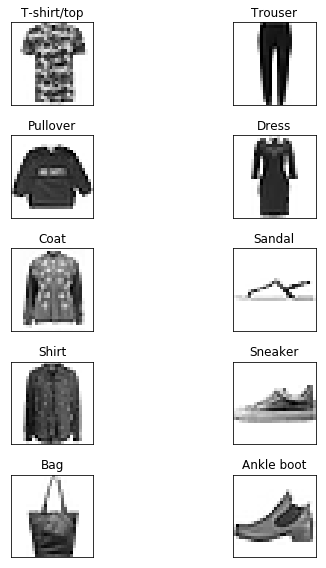

In [102]:
#initiate figure
fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True)
ax = ax.flatten()

#increase size of plots
fig.set_figheight(8)
fig.set_figwidth(8)

#loop over df and plot images
for index, row in train_images.iterrows():
    img = np.array(row[1:]).reshape(28,28)
    ax[row[0]].imshow(img, cmap='Greys')
    ax[row[0]].set_title(label_dict[row[0]])
    #plt.imshow(np.array(row[1:]).reshape(28,28), cmap = "Greys")

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

0


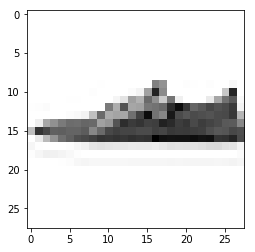

In [59]:
sample_1 = X_train[0].reshape(28,28)
#get corresponding label
sample_label_1 = np.where(X_labels[0] == 1)[0][0]
plt.imshow(X_train[0].reshape(28,28), cmap = 'Greys')

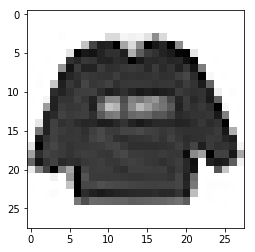

In [79]:
plt.imshow(np.array(train.iloc[0,1:]).reshape(28,28), cmap = "Greys")

In [46]:
y[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Model 

### Neural Network - CNN 

In [13]:
batch_size = 256
num_classes = 10
epochs = 50

#input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [15]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_labels, y_labels))
score = model.evaluate(X_test, y_test, verbose=0)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 49s 1ms/step - loss: 0.8406 - acc: 0.6871 - val_loss: 0.5126 - val_acc: 0.8100
Epoch 2/50
48000/48000 [==============================] - 45s 936us/step - loss: 0.5205 - acc: 0.8072 - val_loss: 0.4095 - val_acc: 0.8490
Epoch 3/50
48000/48000 [==============================] - 46s 962us/step - loss: 0.4452 - acc: 0.8364 - val_loss: 0.3584 - val_acc: 0.8690
Epoch 4/50
48000/48000 [==============================] - 47s 981us/step - loss: 0.3967 - acc: 0.8559 - val_loss: 0.3277 - val_acc: 0.8822
Epoch 5/50
48000/48000 [==============================] - 45s 944us/step - loss: 0.3647 - acc: 0.8676 - val_loss: 0.3099 - val_acc: 0.8877
Epoch 6/50
48000/48000 [==============================] - 48s 996us/step - loss: 0.3458 - acc: 0.8740 - val_loss: 0.2989 - val_acc: 0.8921
Epoch 7/50
48000/48000 [==============================] - 51s 1ms/step

In [29]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2005476237297058
Test accuracy: 0.9258


## SVM 

### References

1. https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5